In [197]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.model_selection import cross_val_score

In [145]:
df = pickle.load(open('tc_data.pickle','rb'))

In [198]:
svm = pickle.load(open('svc_model.pickle','rb'))
mnb = pickle.load(open('mnb_model.pickle','rb'))
mlr = pickle.load(open('mlr_model.pickle','rb'))
knn = pickle.load(open('knn_model.pickle','rb'))

In [147]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

In [148]:
x_train = pickle.load(open('features_tr.pickle', 'rb'))
y_train = pickle.load(open('labels_tr.pickle', 'rb'))
x_test = pickle.load(open('features_te.pickle', 'rb'))
y_test = pickle.load(open('labels_te.pickle', 'rb'))

In [149]:
pred1 = svm.predict_proba(x_test)
pred2 = mnb.predict_proba(x_test)
pred3 = mlr.predict_proba(x_test)
pred4 = knn.predict_proba(x_test)

In [150]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred1[:,1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred2[:,1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred3[:,1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred4[:,1], pos_label = 1)

In [151]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label = 1)

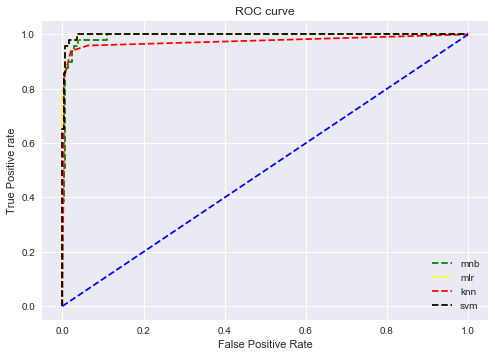

In [152]:
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='mnb')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='mlr')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='knn')
plt.plot(fpr1, tpr1, linestyle='--',color='black', label='svm')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [155]:
svc1 = svm.SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=8,
    shrinking=True, tol=0.001, verbose=False)

In [156]:
cv_scores = cross_val_score(svc1.fit(x_train, y_train), x_train, y_train, cv=5)

In [157]:
print(cv_scores)

[0.95789474 0.93139842 0.94444444 0.95502646 0.93617021]


In [158]:
sum(cv_scores)/5

0.9449868531931012

In [159]:
mlr1 = LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [160]:
cv_scores1 = cross_val_score(mlr1.fit(x_train, y_train), x_train, y_train, cv=5)

In [208]:
cv_scores1

array([0.96578947, 0.94195251, 0.95767196, 0.97089947, 0.94680851])

In [127]:
sum(cv_scores1)/5

0.9566243838980485

In [162]:
round(np.std(np.array(cv_scores1)),5)

0.01096

In [143]:
round(np.std(np.array(cv_scores)), 5)

0.0103

In [169]:
predictions = svm.predict(x_test)

In [200]:
d = {
     'Model': 'SVM',
     'Training Set Accuracy': accuracy_score(y_train, svm.predict(x_train)),
     'Test Set Accuracy': accuracy_score(y_test, predictions),
     'precision': precision_score(y_test, predictions, average = 'macro'),
     'recall': recall_score(y_test, predictions, average = 'macro'),
     'f1-score': f1_score(y_test, predictions, average = 'macro')
}

In [201]:
d

{'Model': 'SVM',
 'Training Set Accuracy': 0.9592808038075092,
 'Test Set Accuracy': 0.9401197604790419,
 'precision': 0.9445907349355626,
 'recall': 0.937816830435878,
 'f1-score': 0.9402663593435724}

In [186]:
predictions1 = knn.predict(x_test)

In [202]:
d1 = {
     'Model': 'KNN',
     'Training Set Accuracy': accuracy_score(y_train, knn.predict(x_train)),
     'Test Set Accuracy': accuracy_score(y_test, predictions1),
     'precision': precision_score(y_test, predictions1, average = 'macro'),
     'recall': recall_score(y_test, predictions1, average = 'macro'),
     'f1-score': f1_score(y_test, predictions1, average = 'macro')
}

In [203]:
d1

{'Model': 'KNN',
 'Training Set Accuracy': 0.9598096245372819,
 'Test Set Accuracy': 0.9281437125748503,
 'precision': 0.9284918365692878,
 'recall': 0.9239669942050895,
 'f1-score': 0.9255925766707774}

In [191]:
predictions2 = mnb.predict(x_test)

In [204]:
d2 = {
     'Model': 'MNB',
     'Training Set Accuracy': accuracy_score(y_train, mnb.predict(x_train)),
     'Test Set Accuracy': accuracy_score(y_test, predictions2),
     'precision': precision_score(y_test, predictions2, average = 'macro'),
     'recall': recall_score(y_test, predictions2, average = 'macro'),
     'f1-score': f1_score(y_test, predictions2, average = 'macro')
}

In [205]:
d2

{'Model': 'MNB',
 'Training Set Accuracy': 0.9539925965097832,
 'Test Set Accuracy': 0.9341317365269461,
 'precision': 0.9354436437418672,
 'recall': 0.9299622071050642,
 'f1-score': 0.9320511142057424}

In [194]:
predictions3 = mlr.predict(x_test)

In [206]:
d3 = {
     'Model': 'MLR',
     'Training Set Accuracy': accuracy_score(y_train, mlr.predict(x_train)),
     'Test Set Accuracy': accuracy_score(y_test, predictions3),
     'precision': precision_score(y_test, predictions3, average = 'macro'),
     'recall': recall_score(y_test, predictions3, average = 'macro'),
     'f1-score': f1_score(y_test, predictions3, average = 'macro')
}

In [207]:
d3

{'Model': 'MLR',
 'Training Set Accuracy': 0.9814912744579588,
 'Test Set Accuracy': 0.9401197604790419,
 'precision': 0.9388102404102909,
 'recall': 0.9402935248173343,
 'f1-score': 0.9390741142006105}

In [211]:
df_svm = pd.DataFrame(d, index = [0])
df_knn = pd.DataFrame(d1, index = [0])
df_mnb = pd.DataFrame(d2, index = [0])
df_mlr = pd.DataFrame(d3, index = [0])

In [218]:
final_result = pd.concat([df_svm, df_knn, df_mnb, df_mlr])

In [219]:
final_result

,Model,Training Set Accuracy,Test Set Accuracy,precision,recall,f1-score
0,SVM,0.959281,0.940120,0.944591,0.937817,0.940266
0,KNN,0.959810,0.928144,0.928492,0.923967,0.925593
0,MNB,0.953993,0.934132,0.935444,0.929962,0.932051
0,MLR,0.981491,0.940120,0.938810,0.940294,0.939074
